<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I chose two related bike counting datasets from the NYC Open Data Portal that each come with a metadata dictionary:
* [Bicycle Counts](https://data.cityofnewyork.us/Transportation/Bicycle-Counts/uczf-rk3c/about_data)
    * "Bicycle counts conducted around New York City at key locations. For the counter locations."
    * Filtered for 1/1/2024 to 10/28/2024
    * Includes:
        * Count ID (for the instance of the count)
        * ID (count location ID that joins to the Bicycle Counters below)
        * Date
        * Counts 
* [Bicycle Counters](https://data.cityofnewyork.us/Transportation/Bicycle-Counters/smn3-rzf9/about_data)
    * Metadata dictionary for Bicycle Counts
    * Includes:
    * Name of count location
     * Latitudes and longitudes

For this exercise, I've decided I'm interested in:
* Trends by date and location
* Trends by hour

The two datasets can be joined on the ID column in both datasets.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



Answer:
First, I will load the data from my Google Cloud Platform instance. I uploaded the files to a isolated bucket for CUNY-related work and then enabled public access. Clicking any of these links will initiate a download of the file.

In [1]:
import pandas as pd
import builtins

nyc_bike_counter_url = 'https://storage.googleapis.com/data_science_masters_files/2024_fall/data_602_advanced_python/week_ten/Bicycle_Counters_20241028.csv'
nyc_bike_counter_df = pd.read_csv(nyc_bike_counter_url)

nyc_bike_counts_url = 'https://storage.googleapis.com/data_science_masters_files/2024_fall/data_602_advanced_python/week_ten/Bicycle_Counts_20241028.csv'
nyc_bike_counts_df = pd.read_csv(nyc_bike_counts_url)

/Users/uwsthoughts/venv-metal/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/Users/uwsthoughts/venv-metal/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Next, I will define and run a function I've used in previous assignments that will give me the following dataframe information:
* Data types
* Duplicates
* NAs
* Distinct values


In [2]:
def df_deets(df_or_names):
    def print_info(df, df_name):
        print(f"{df_name}:")
        if hasattr(builtins, "display"):
            display(df)
        else:
            print(df)
        print("\n")
        
        # Summary of data types, duplicates, NAs, and distinct values
        summary_df = pd.DataFrame({
            "Data types": df.dtypes,
            "Duplicates": [df.duplicated(subset=[col]).sum() for col in df.columns],
            "NAs": df.isna().sum().values,
            "Distinct values": df.nunique().values
        }).set_index(df.columns)
        
        print(f"{df_name} summary:")
        if hasattr(builtins, "display"):
            display(summary_df)
        else:
            print(summary_df)
        print("\n")
        print(df.columns)
        print("\n")
        total_duplicates = df.duplicated().sum()
        print(f"Total number of duplicate rows in {df_name}: {total_duplicates}\n")

    if isinstance(df_or_names, list): 
        for item in df_or_names:
            if isinstance(item, str):
                df = globals()[item] 
                print_info(df, item)
            else:
                print_info(item, "dataframe")
    else: 
        if isinstance(df_or_names, str):
            df = globals()[df_or_names]  
            print_info(df, df_or_names)
        else:
            print_info(df_or_names, "dataframe")


## Data samples

### nyc_bike_counter_df data samples


In [3]:
df_deets('nyc_bike_counter_df')


nyc_bike_counter_df:


,id,name,domain,latitude,longitude,interval,timezone,sens,counter
0,100010017,Staten Island Ferry,New York City DOT,40.643387,-74.072075,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104568
1,300027723,Fountain Ave,New York City DOT,40.655606,-73.862951,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104569
2,100057318,Broadway at 50th St,New York City DOT,40.761380,-73.984080,15,(UTC-05:00) US/Eastern;DST,5,Y2H18055362
3,100010018,Pulaski Bridge,New York City DOT,40.742563,-73.951492,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042948
4,100009426,Manhattan Bridge Ped Path,New York City DOT,40.714573,-73.994950,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042941
5,100010019,Kent Ave btw North 8th St and North 9th St,New York City DOT,40.720959,-73.960930,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042949
6,100010022,Brooklyn Bridge Bike Path,New York City DOT,40.709274,-74.000990,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042940
7,300020241,Brooklyn Bridge Bicycle Path (Roadway),New York City DOT,40.712656,-74.004464,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042943
8,100055175,Manhattan Bridge Interference Calibration 2019...,New York City DOT,0.000000,0.000000,15,(UTC-05:00) US/Eastern;DST,5,Y2H13074105
9,100058279,Kent Ave btw South 6th St. and Broadway,New York City DOT,40.711282,-73.968386,15,(UTC-05:00) US/Eastern;DST,5,NaN




nyc_bike_counter_df summary:


,Data types,Duplicates,NAs,Distinct values
id,int64,0,0,41
name,object,0,0,41
domain,object,40,0,1
latitude,float64,12,0,29
longitude,float64,12,0,29
interval,int64,39,0,2
timezone,object,40,0,1
sens,int64,40,0,1
counter,object,17,8,23




Index(['id', 'name', 'domain', 'latitude', 'longitude', 'interval', 'timezone',
       'sens', 'counter'],
      dtype='object')


Total number of duplicate rows in nyc_bike_counter_df: 0



### nyc_bike_counts_df data samples

In [4]:
df_deets('nyc_bike_counts_df')


nyc_bike_counts_df:


,countid,id,date,counts,status
0,55984471,100009425,01/01/2024 08:00:00 PM,0,0
1,55984577,100009426,01/01/2024 08:00:00 PM,0,0
2,55984676,100009427,01/01/2024 08:00:00 PM,10,0
3,55984799,100010017,01/01/2024 08:00:00 PM,0,0
4,55984905,100010018,01/01/2024 08:00:00 PM,14,0
...,...,...,...,...,...
852641,105687933,300041240,10/27/2024 11:45:00 PM,3,0
852642,105688164,300043075,10/27/2024 11:45:00 PM,0,0
852643,105688266,300043076,10/27/2024 11:45:00 PM,0,0
852644,105688464,300043077,10/27/2024 11:45:00 PM,0,0




nyc_bike_counts_df summary:


,Data types,Duplicates,NAs,Distinct values
countid,int64,0,0,852646
id,int64,852615,0,31
date,object,823834,0,28812
counts,int64,852290,0,356
status,int64,852645,0,1




Index(['countid', 'id', 'date', 'counts', 'status'], dtype='object')


Total number of duplicate rows in nyc_bike_counts_df: 0



# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

Answer:
First, I'll join the two dataframes on the ID column. This will give me one complete view of the bike counting data.


In [5]:
nyc_bike_combined_df = nyc_bike_counts_df.merge(nyc_bike_counter_df, on='id')

In [6]:
df_deets('nyc_bike_combined_df')

nyc_bike_combined_df:


,countid,id,date,counts,status,name,domain,latitude,longitude,interval,timezone,sens,counter
0,55984471,100009425,01/01/2024 08:00:00 PM,0,0,Prospect Park West,New York City DOT,40.671288,-73.971382,60,(UTC-05:00) US/Eastern;DST,5,Y2H21121588
1,55984577,100009426,01/01/2024 08:00:00 PM,0,0,Manhattan Bridge Ped Path,New York City DOT,40.714573,-73.994950,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042941
2,55984676,100009427,01/01/2024 08:00:00 PM,10,0,Williamsburg Bridge Bike Path,New York City DOT,40.710530,-73.961450,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042936
3,55984799,100010017,01/01/2024 08:00:00 PM,0,0,Staten Island Ferry,New York City DOT,40.643387,-74.072075,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104568
4,55984905,100010018,01/01/2024 08:00:00 PM,14,0,Pulaski Bridge,New York City DOT,40.742563,-73.951492,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852641,105687933,300041240,10/27/2024 11:45:00 PM,3,0,Ocean Pkwy at Avenue J,New York City DOT,40.624303,-73.970609,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104567
852642,105688164,300043075,10/27/2024 11:45:00 PM,0,0,Emmons Ave Peds,New York City DOT,40.584100,-73.930990,15,(UTC-05:00) US/Eastern;DST,5,YAH22104564
852643,105688266,300043076,10/27/2024 11:45:00 PM,0,0,Emmons Ave Bikes,New York City DOT,40.584100,-73.930990,15,(UTC-05:00) US/Eastern;DST,5,YAH22104564
852644,105688464,300043077,10/27/2024 11:45:00 PM,0,0,High Bridge Peds,New York City DOT,40.842190,-73.932070,15,(UTC-05:00) US/Eastern;DST,5,YAH22104566




nyc_bike_combined_df summary:


,Data types,Duplicates,NAs,Distinct values
countid,int64,0,0,852646
id,int64,852615,0,31
date,object,823834,0,28812
counts,int64,852290,0,356
status,int64,852645,0,1
name,object,852615,0,31
domain,object,852645,0,1
latitude,float64,852625,0,21
longitude,float64,852625,0,21
interval,int64,852644,0,2




Index(['countid', 'id', 'date', 'counts', 'status', 'name', 'domain',
       'latitude', 'longitude', 'interval', 'timezone', 'sens', 'counter'],
      dtype='object')


Total number of duplicate rows in nyc_bike_combined_df: 0



After reviewing the above, I can see that:
*  `status`, `domain`, `timezone`, and `sens` have one distinct value each
*  `id` isjust the distinct numeric representation of the count location

I'll drop these columns.

In [7]:
nyc_bike_combo_df = nyc_bike_combined_df.drop(columns=['status', 'domain', 'timezone', 'sens', 'id'])
df_deets('nyc_bike_combo_df')


nyc_bike_combo_df:


,countid,date,counts,name,latitude,longitude,interval,counter
0,55984471,01/01/2024 08:00:00 PM,0,Prospect Park West,40.671288,-73.971382,60,Y2H21121588
1,55984577,01/01/2024 08:00:00 PM,0,Manhattan Bridge Ped Path,40.714573,-73.994950,15,Y2H22042941
2,55984676,01/01/2024 08:00:00 PM,10,Williamsburg Bridge Bike Path,40.710530,-73.961450,15,Y2H22042936
3,55984799,01/01/2024 08:00:00 PM,0,Staten Island Ferry,40.643387,-74.072075,15,Y2H22104568
4,55984905,01/01/2024 08:00:00 PM,14,Pulaski Bridge,40.742563,-73.951492,15,Y2H22042948
...,...,...,...,...,...,...,...,...
852641,105687933,10/27/2024 11:45:00 PM,3,Ocean Pkwy at Avenue J,40.624303,-73.970609,15,Y2H22104567
852642,105688164,10/27/2024 11:45:00 PM,0,Emmons Ave Peds,40.584100,-73.930990,15,YAH22104564
852643,105688266,10/27/2024 11:45:00 PM,0,Emmons Ave Bikes,40.584100,-73.930990,15,YAH22104564
852644,105688464,10/27/2024 11:45:00 PM,0,High Bridge Peds,40.842190,-73.932070,15,YAH22104566




nyc_bike_combo_df summary:


,Data types,Duplicates,NAs,Distinct values
countid,int64,0,0,852646
date,object,823834,0,28812
counts,int64,852290,0,356
name,object,852615,0,31
latitude,float64,852625,0,21
longitude,float64,852625,0,21
interval,int64,852644,0,2
counter,object,852625,0,21




Index(['countid', 'date', 'counts', 'name', 'latitude', 'longitude',
       'interval', 'counter'],
      dtype='object')


Total number of duplicate rows in nyc_bike_combo_df: 0



# Visualizations
The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.


### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

Answer:

/Users/uwsthoughts/venv-metal/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/uwsthoughts/venv-metal/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


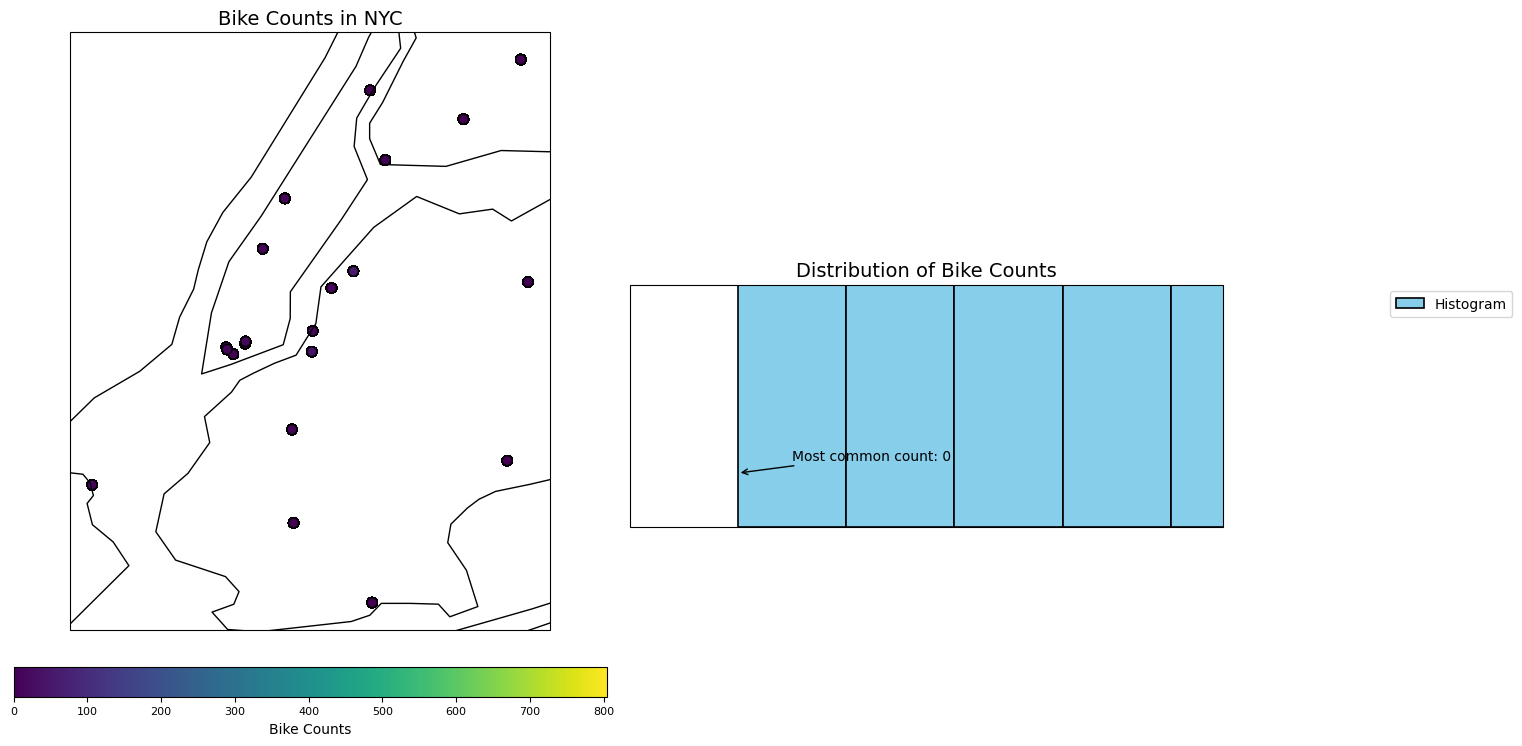

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

ax1.set_title("Bike Counts in NYC", fontsize=14)
scatter = ax1.scatter(nyc_bike_combined_df['longitude'], nyc_bike_combined_df['latitude'], 
                      c=nyc_bike_combined_df['counts'], cmap='viridis', s=50, edgecolor='k')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS)
ax1.set_xlabel("Longitude", fontsize=12)
ax1.set_ylabel("Latitude", fontsize=12)

cbar = fig.colorbar(scatter, ax=ax1, orientation='horizontal', pad=0.05)
cbar.set_label("Bike Counts", fontsize=10)
cbar.ax.tick_params(labelsize=8)

ax2.hist(nyc_bike_combined_df['counts'], bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
ax2.set_title("Distribution of Bike Counts", fontsize=14)
ax2.set_xlabel("Count Value", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)

ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

max_count = nyc_bike_combined_df['counts'].value_counts().idxmax()
ax2.annotate(f'Most common count: {max_count}', xy=(max_count, 20), xytext=(max_count + 20, 25),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.legend(['Histogram'], loc='upper right', fontsize=10, bbox_to_anchor=(1.5, 1))
plt.tight_layout()

plt.show()


### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.




### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  